In [1]:
import networkx as nx

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
portfolio = ['BTC/USD', 'ETH/USD', 'SOL/USD', 'BNB/USD', 'LTC/USD', 'DOGE/USD']

def create_data_dictionary(portfolio):
    
    data_portfolio = {}
    
    for asset in portfolio:
        pair = asset
        pair = pair.replace('/', '-')
        df = pd.read_csv(f'../data_download_moodle/data/data_{pair}.csv')
        
        data_portfolio[asset] = df
    
    return data_portfolio

data_portfolio = create_data_dictionary(portfolio)
data_portfolio.keys()

dict_keys(['BTC/USD', 'ETH/USD', 'SOL/USD', 'BNB/USD', 'LTC/USD', 'DOGE/USD'])

In [3]:
data_portfolio['BTC/USD']

,Time,Open,High,Low,Close,Volume
0,2021-12-25 00:00:00,50796.0,50807.0,50566.0,50670.0,2.293749e+06
1,2021-12-25 00:05:00,50670.0,50783.0,50669.0,50741.0,2.025913e+06
2,2021-12-25 00:10:00,50741.0,50741.0,50535.0,50582.0,2.897014e+06
3,2021-12-25 00:15:00,50582.0,50681.0,50521.0,50681.0,1.785521e+06
4,2021-12-25 00:20:00,50681.0,50767.0,50652.0,50756.0,1.062458e+06
...,...,...,...,...,...,...
2587,2022-01-02 23:35:00,47239.0,47406.0,47213.0,47315.0,1.185534e+06
2588,2022-01-02 23:40:00,47315.0,47394.0,47315.0,47394.0,3.286963e+05
2589,2022-01-02 23:45:00,47394.0,47394.0,47299.0,47300.0,4.014382e+05
2590,2022-01-02 23:50:00,47300.0,47300.0,47248.0,47284.0,1.202602e+06


In [4]:
def create_log_dict(data_portfolio):
    
    log_dict = {}
    
    for key in data_portfolio.keys():
        closing_prices = data_portfolio[key]['Close']
        log_dict[key] = (np.log(closing_prices) - np.log(closing_prices.shift(1))).dropna()
    
    return log_dict

In [5]:
log_rets_portfolio = create_log_dict(data_portfolio)
log_rets_portfolio_df = pd.DataFrame(log_rets_portfolio)

In [6]:
corr_matrix = log_rets_portfolio_df.corr()

In [7]:
corr_matrix

,BTC/USD,ETH/USD,SOL/USD,BNB/USD,LTC/USD,DOGE/USD
BTC/USD,1.000000,0.865205,0.721419,0.830740,0.842014,0.777542
ETH/USD,0.865205,1.000000,0.733600,0.837382,0.830682,0.768674
SOL/USD,0.721419,0.733600,1.000000,0.742351,0.709507,0.689566
BNB/USD,0.830740,0.837382,0.742351,1.000000,0.829016,0.781486
LTC/USD,0.842014,0.830682,0.709507,0.829016,1.000000,0.780631
DOGE/USD,0.777542,0.768674,0.689566,0.781486,0.780631,1.000000


<AxesSubplot:>

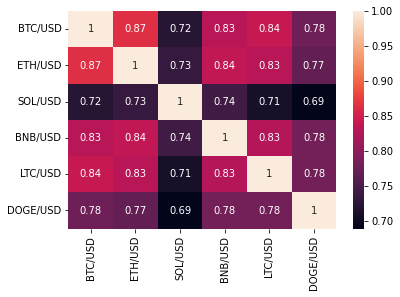

In [8]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, annot=True)

In [9]:
cryptos = corr_matrix.index.values

In [10]:
corr_matrix = np.asmatrix(corr_matrix)

In [11]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(corr_matrix)

In [12]:
#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G, lambda x: cryptos[x])

In [13]:
#Shows the first 5 edges with their corresponding edges
list(G.edges(data=True))

[('BTC/USD', 'BTC/USD', {'weight': 1.0}),
 ('BTC/USD', 'ETH/USD', {'weight': 0.8652052837165932}),
 ('BTC/USD', 'SOL/USD', {'weight': 0.7214188665844032}),
 ('BTC/USD', 'BNB/USD', {'weight': 0.830739639083139}),
 ('BTC/USD', 'LTC/USD', {'weight': 0.8420143356555676}),
 ('BTC/USD', 'DOGE/USD', {'weight': 0.7775415588506775}),
 ('ETH/USD', 'ETH/USD', {'weight': 1.0}),
 ('ETH/USD', 'SOL/USD', {'weight': 0.7335999183621542}),
 ('ETH/USD', 'BNB/USD', {'weight': 0.837381908099837}),
 ('ETH/USD', 'LTC/USD', {'weight': 0.8306820060542627}),
 ('ETH/USD', 'DOGE/USD', {'weight': 0.7686736427257255}),
 ('SOL/USD', 'SOL/USD', {'weight': 1.0}),
 ('SOL/USD', 'BNB/USD', {'weight': 0.7423509732714084}),
 ('SOL/USD', 'LTC/USD', {'weight': 0.7095068426349267}),
 ('SOL/USD', 'DOGE/USD', {'weight': 0.6895658835764127}),
 ('BNB/USD', 'BNB/USD', {'weight': 1.0}),
 ('BNB/USD', 'LTC/USD', {'weight': 0.8290155974621028}),
 ('BNB/USD', 'DOGE/USD', {'weight': 0.781485875750368}),
 ('LTC/USD', 'LTC/USD', {'weight'

In [14]:
list(nx.selfloop_edges(G))

[('BTC/USD', 'BTC/USD'),
 ('ETH/USD', 'ETH/USD'),
 ('SOL/USD', 'SOL/USD'),
 ('BNB/USD', 'BNB/USD'),
 ('LTC/USD', 'LTC/USD'),
 ('DOGE/USD', 'DOGE/USD')]

In [15]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_1(G):
    
    H = G.copy()
    H.remove_edges_from(nx.selfloop_edges(H))
    
    print(f'Self loops edges list: {list(nx.selfloop_edges(H))}')
    print(f'Number of nodes: {H.number_of_nodes()}')
    print(f'Number of edges: {H.number_of_edges()}')
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H, 'weight').items())
    
    labels = {e: round(H.edges[e]['weight'], 2) for e in H.edges}

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='green',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edgelist=edges, style='solid')
    
    nx.draw_networkx_edge_labels(H, positions, edge_labels=labels)
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 
    
    return H

Self loops edges list: []
Number of nodes: 6
Number of edges: 15


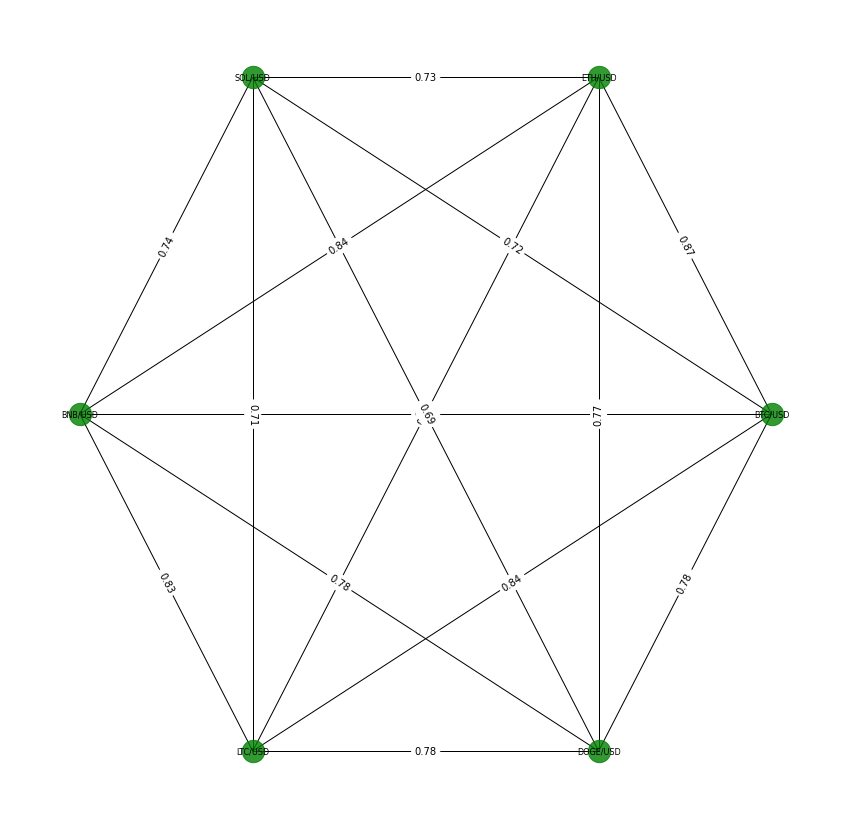

In [16]:
graph = create_corr_network_1(G)

In [17]:
print(graph.edges('BTC/USD'))

[('BTC/USD', 'ETH/USD'), ('BTC/USD', 'SOL/USD'), ('BTC/USD', 'BNB/USD'), ('BTC/USD', 'LTC/USD'), ('BTC/USD', 'DOGE/USD')]


In [18]:
# Function to create and display networks from the correlatin matrix. 

def create_corr_network_2(G, corr_direction, threshold):
    ## Creates a copy of the graph
    H = G.copy()
    
    H.remove_edges_from(nx.selfloop_edges(H))
    
    ## Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges(data=True):
        ## If we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            
            if weight["weight"] < threshold or weight["weight"] < 0:
                H.remove_edge(stock1, stock2)
        
        ## This part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0 or weight["weight"] < threshold:
                H.remove_edge(stock1, stock2)
                
    
    # Creates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    labels = {e: round(H.edges[e]['weight'], 2) for e in H.edges}

    # Positions
    positions=nx.circular_layout(H)
    
    # Figure size
    plt.figure(figsize=(15,15))

    # Draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    # Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid')
    
    nx.draw_networkx_edge_labels(H, positions, edge_labels=labels)
    
    print(f'Number of nodes: {H.number_of_nodes()}')
    print(f'Number of edges: {H.number_of_edges()}')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part2" + corr_direction + ".png", format="PNG")
    plt.show() 

Number of nodes: 6
Number of edges: 11


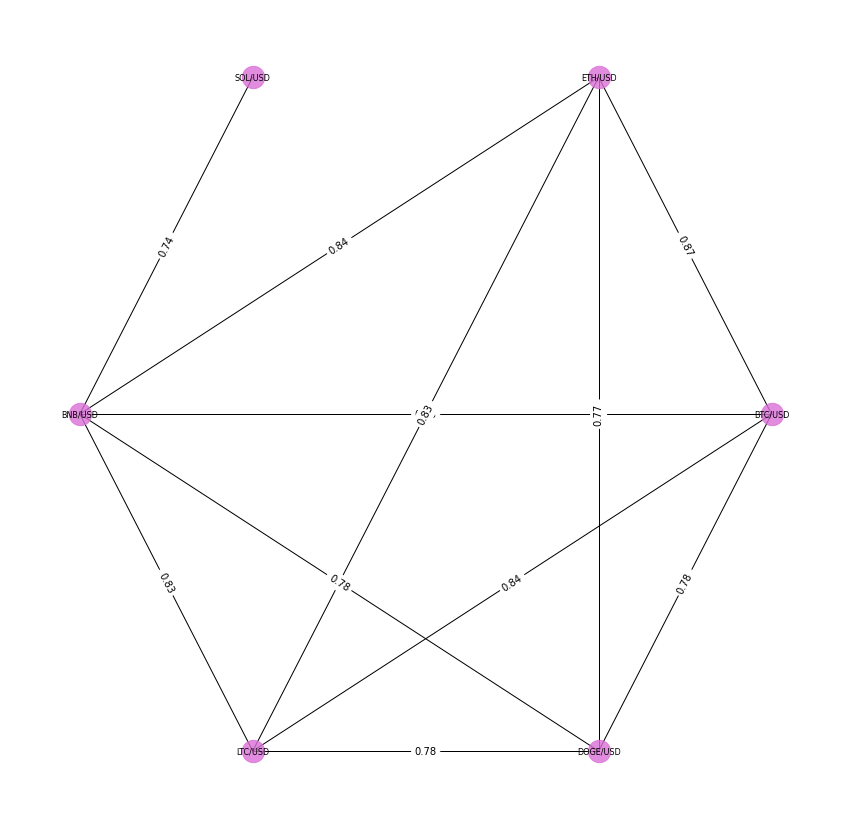

In [19]:
create_corr_network_2(G, corr_direction="positive", threshold=0.74)

# Styling the edges based on their weights

In [20]:
# Function to create and display networks from the correlatin matrix. 

def create_corr_network_3(G, corr_direction, threshold):
    H = G.copy()
    
    H.remove_edges_from(nx.selfloop_edges(H))
    
    ## Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges(data=True):
        ## If we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] < threshold or weight["weight"] < 0:
                H.remove_edge(stock1, stock2)
        
        ## This part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0 or weight["weight"] < threshold:
                H.remove_edge(stock1, stock2)
    
    labels = {e: round(H.edges[e]['weight'], 2) for e in H.edges}
                
    
    # Creates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ## Increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])

    # Positions
    positions=nx.circular_layout(H)
    
    # Figure size
    plt.figure(figsize=(15,15))

    # Draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6', 
                           node_size=500,alpha=0.8)
    
    # Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    # Edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    # Draws the edges
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    
    nx.draw_networkx_edge_labels(H, positions, edge_labels=labels)
    
    print(f'Number of nodes: {H.number_of_nodes()}')
    print(f'Number of edges: {H.number_of_edges()}')

    # Displays the graph without axis
    plt.axis('off')
    # Saves image
    plt.savefig("part3" + corr_direction + ".png", format="PNG")
    plt.show()
    
    return H

Number of nodes: 6
Number of edges: 8


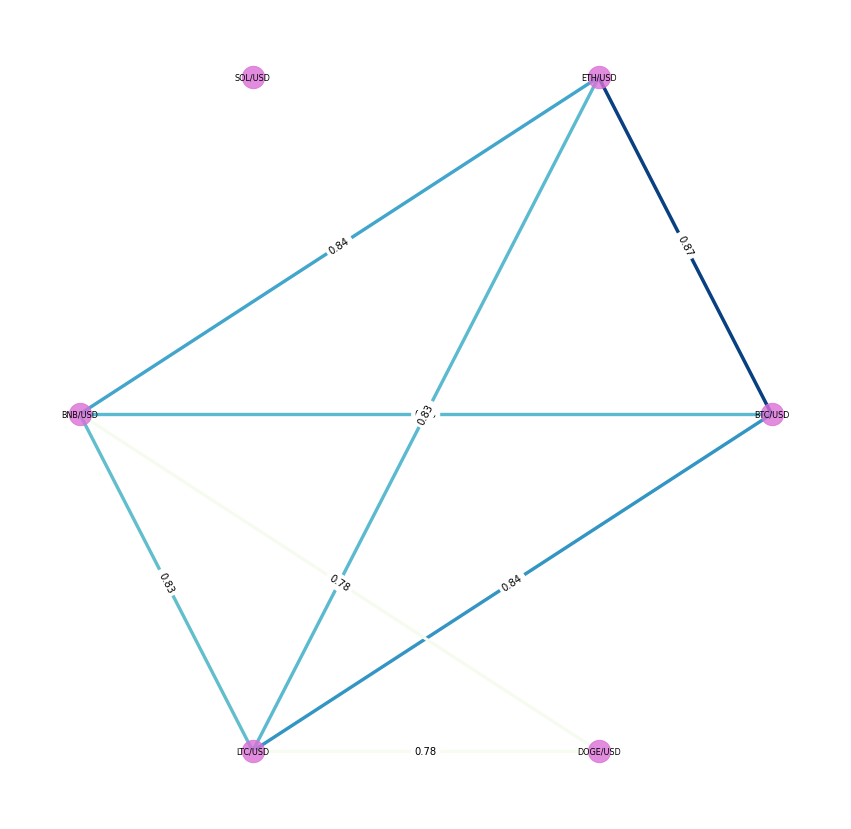

In [21]:
create_corr_network_3(G, corr_direction="positive", threshold=0.78)

# Degree centrality

Number of nodes: 6
Number of edges: 8


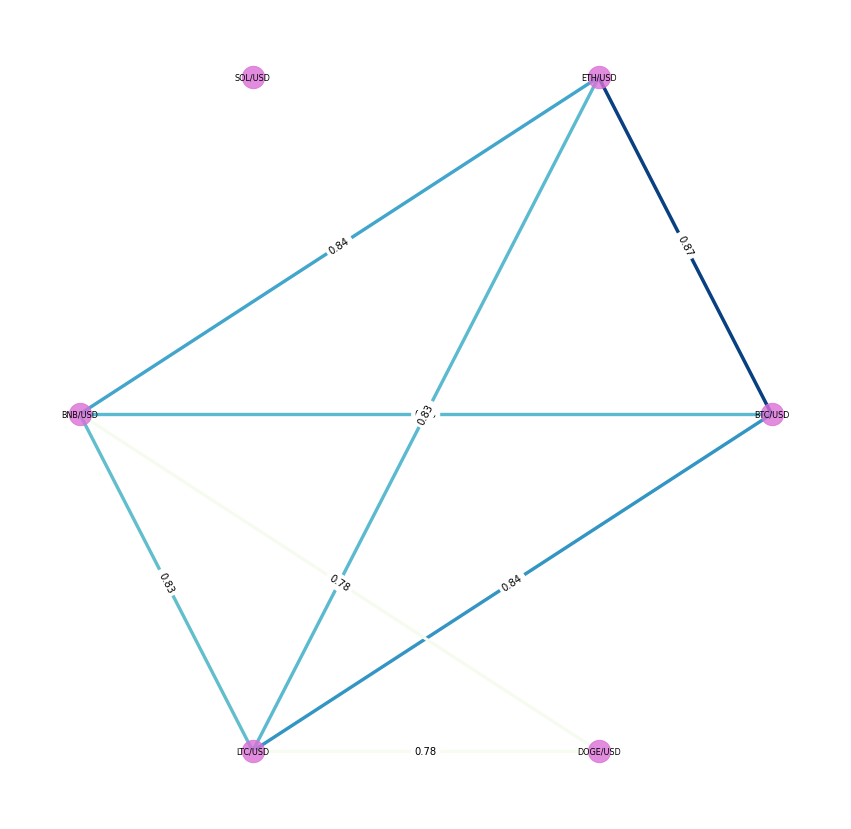

{'BTC/USD': 0.6000000000000001, 'ETH/USD': 0.6000000000000001, 'SOL/USD': 0.0, 'BNB/USD': 0.8, 'LTC/USD': 0.8, 'DOGE/USD': 0.4}


In [22]:
graph = create_corr_network_3(G, corr_direction="positive", threshold=0.78)
print(nx.degree_centrality(graph))

# Eigenvector Centrality

In [23]:
print(nx.eigenvector_centrality(graph))

{'BTC/USD': 0.4390419009464209, 'ETH/USD': 0.4390419009464209, 'SOL/USD': 1.9875340584941136e-07, 'BNB/USD': 0.5100364187624248, 'LTC/USD': 0.5100364187624248, 'DOGE/USD': 0.3069366734338985}


In [24]:
# Clustering coefficient

Number of nodes: 6
Number of edges: 8


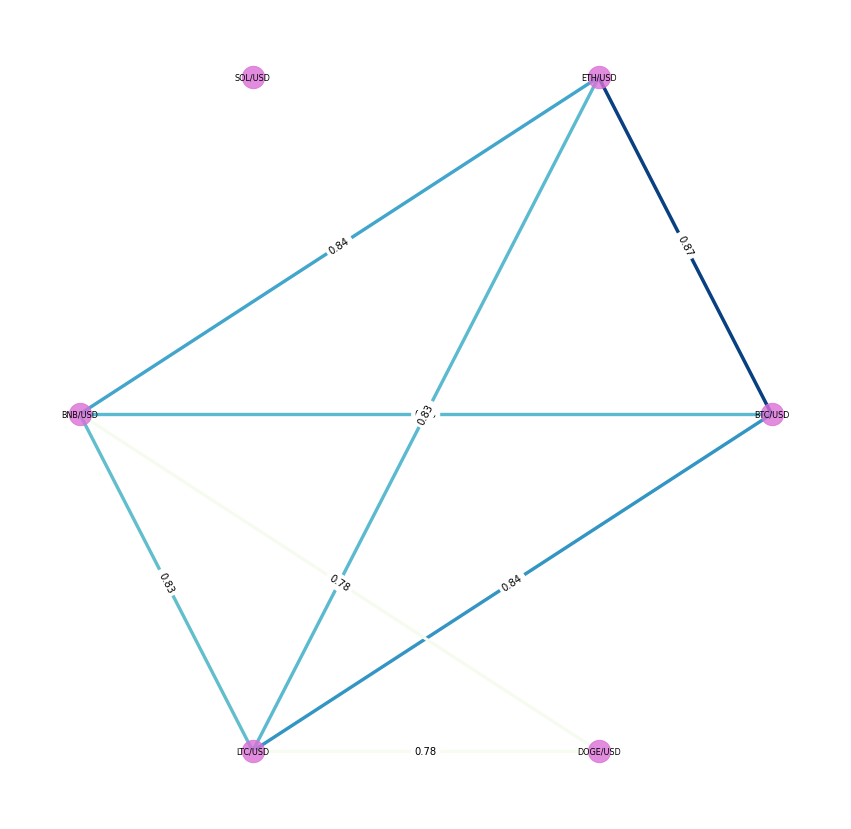

{'BTC/USD': 1.0, 'ETH/USD': 1.0, 'SOL/USD': 0, 'BNB/USD': 0.6666666666666666, 'LTC/USD': 0.6666666666666666, 'DOGE/USD': 1.0}


In [25]:
graph = create_corr_network_3(G, corr_direction="positive", threshold=0.78)
print(nx.clustering(graph))

Number of nodes: 6
Number of edges: 8


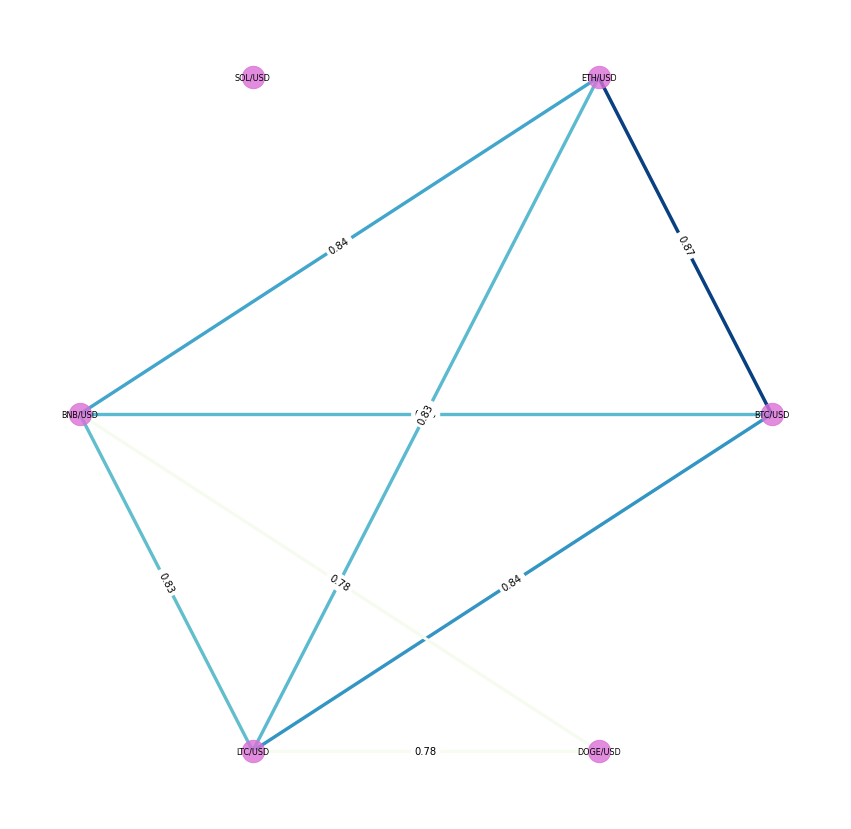

0.7222222222222222


In [26]:
graph = create_corr_network_3(G, corr_direction="positive", threshold=0.78)
print(nx.average_clustering(graph))

# Number of triangles

Number of nodes: 6
Number of edges: 8


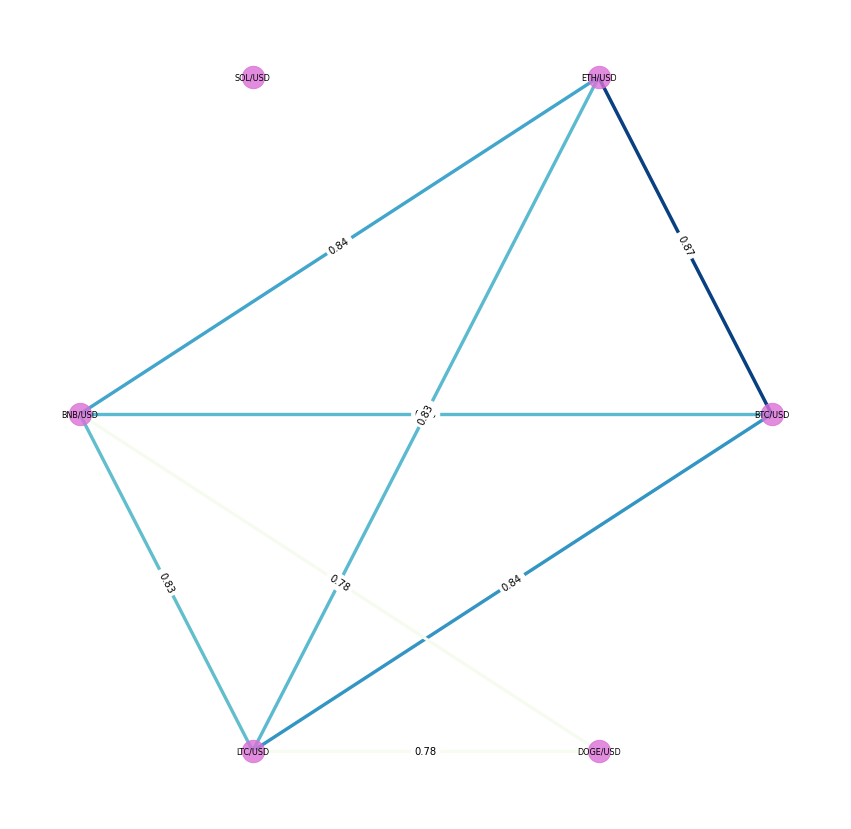

{'BTC/USD': 3, 'ETH/USD': 3, 'SOL/USD': 0, 'BNB/USD': 4, 'LTC/USD': 4, 'DOGE/USD': 1}


In [27]:
graph = create_corr_network_3(G, corr_direction="positive", threshold=0.78)
print(nx.triangles(graph))

# Cliques

Number of nodes: 6
Number of edges: 8


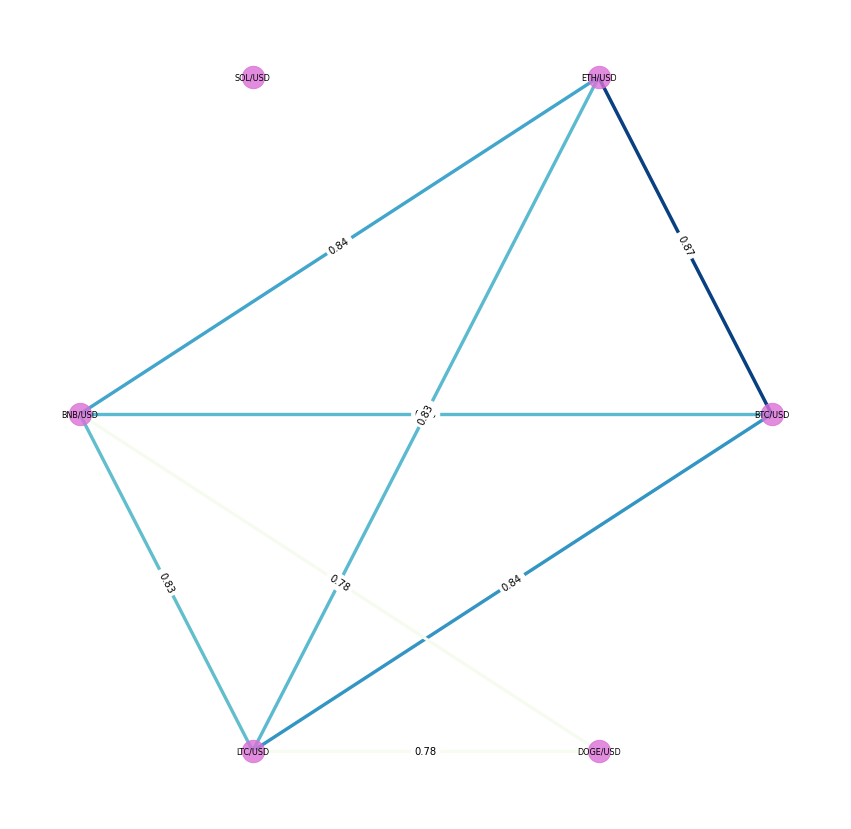

[['BTC/USD'], ['ETH/USD'], ['SOL/USD'], ['BNB/USD'], ['LTC/USD'], ['DOGE/USD'], ['BTC/USD', 'ETH/USD'], ['BTC/USD', 'BNB/USD'], ['BTC/USD', 'LTC/USD'], ['ETH/USD', 'BNB/USD'], ['ETH/USD', 'LTC/USD'], ['BNB/USD', 'LTC/USD'], ['BNB/USD', 'DOGE/USD'], ['LTC/USD', 'DOGE/USD'], ['BTC/USD', 'ETH/USD', 'BNB/USD'], ['BTC/USD', 'ETH/USD', 'LTC/USD'], ['BTC/USD', 'BNB/USD', 'LTC/USD'], ['ETH/USD', 'BNB/USD', 'LTC/USD'], ['BNB/USD', 'LTC/USD', 'DOGE/USD'], ['BTC/USD', 'ETH/USD', 'BNB/USD', 'LTC/USD']]


In [28]:
graph = create_corr_network_3(G, corr_direction="positive", threshold=0.78)
print(list(nx.enumerate_all_cliques(graph)))

# Preferential attachment

In [84]:
import collections 

ba = nx.barabasi_albert_graph(100000, 1)

degrees = sorted([val for (node, val) in ba.degree()])

degreeCount = collections.Counter(degrees)
deg, cnt = zip(*degreeCount.items())

In [85]:
counting = []
for i in degreeCount.values():
    counting.append(i/ba.number_of_nodes())

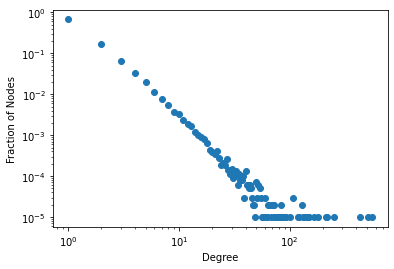

In [86]:
plt.plot(deg,counting, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()